In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:/Users/91845/OneDrive/Desktop/Design Project')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

C:\Users\91845\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'C:\\Users\\91845\\OneDrive\\Desktop\\Design Project'

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

In [7]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [8]:
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [11]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [13]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20


981/981 [==============================] - 29s 27ms/step - loss: 2.1079 - accuracy: 0.4640 - val_loss: 0.8379 - val_accuracy: 0.7902
Epoch 2/20
981/981 [==============================] - 29s 30ms/step - loss: 0.9218 - accuracy: 0.7284 - val_loss: 0.3096 - val_accuracy: 0.9176
Epoch 3/20
981/981 [==============================] - 30s 30ms/step - loss: 0.6108 - accuracy: 0.8168 - val_loss: 0.3376 - val_accuracy: 0.9100
Epoch 4/20
981/981 [==============================] - 29s 30ms/step - loss: 0.4528 - accuracy: 0.8648 - val_loss: 0.1569 - val_accuracy: 0.9550
Epoch 5/20
981/981 [==============================] - 29s 30ms/step - loss: 0.3763 - accuracy: 0.8899 - val_loss: 0.1256 - val_accuracy: 0.9684
Epoch 6/20
981/981 [==============================] - 29s 29ms/step - loss: 0.3223 - accuracy: 0.9076 - val_loss: 0.1082 - val_accuracy: 0.9716
Epoch 7/20
981/981 [==============================] - 29s 29ms/step - loss: 0.2825 - accuracy: 0.9177 - val_loss: 0.0986 - val_accurac

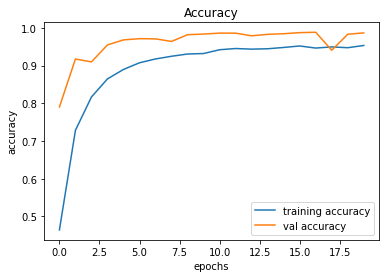

In [15]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

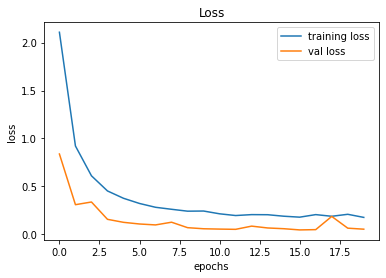

In [16]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [18]:
X_test, label = testing('Test.csv')

In [19]:
#Y_pred = model.predict(X_test)
#Y_pred

# Assuming model is your Sequential model
predictions = model.predict(X_test)
Y_pred = np.argmax(predictions, axis=1)


395/395 [==============================] - 4s 11ms/step


In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9571654790182106


In [21]:
model.save("./training/TSR.h5")

C:\Users\91845\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
import os
os.chdir(r'C:/Users/91845/OneDrive/Desktop/Design Project')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [23]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred

1/1 [==============================] - 0s 106ms/step
Predicted traffic sign is: General caution


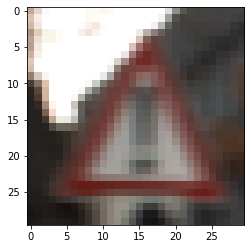

In [27]:
plot, prediction = test_on_img(r'C:/Users/91845/OneDrive/Desktop/Design Project/Test/00331.png')

# Find the index of the maximum value in the prediction array
predicted_class_index = np.argmax(prediction)

# Get the predicted class label
predicted_class = classes[predicted_class_index]

print("Predicted traffic sign is:", predicted_class)
plt.imshow(plot)
plt.show()


FileUpload(value={}, accept='image/*', description='Upload')

Text(value='')

1/1 [==============================] - 0s 79ms/step


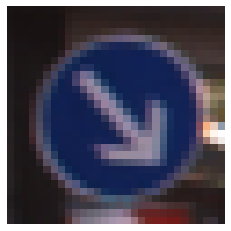

1/1 [==============================] - 0s 56ms/step


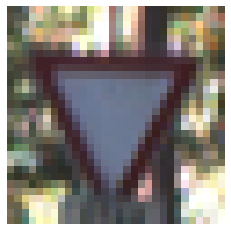

In [31]:
import ipywidgets as widgets
from IPython.display import display, display_markdown
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

# Load the model
from keras.models import load_model
model = load_model('C:/Users/91845/OneDrive/Desktop/Design Project/training/TSR.h5')

# Define the classes
classes = {0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 
           3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 
           6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 
           9: 'No passing', 10: 'No passing veh over 3.5 tons', 11: 'Right-of-way at intersection', 
           12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 
           16: 'Veh > 3.5 tons prohibited', 17: 'No entry', 18: 'General caution', 
           19: 'Dangerous curve left', 20: 'Dangerous curve right', 21: 'Double curve', 
           22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 
           25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 
           29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 
           32: 'End speed + passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 
           35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight or left', 
           38: 'Keep right', 39: 'Keep left', 40: 'Roundabout mandatory', 
           41: 'End of no passing', 42: 'End no passing veh > 3.5 tons'}

# Function to recognize traffic sign
def recognize_traffic_sign(image):
    image = image.resize((30, 30))
    image_np = np.array(image)
    X_test = np.expand_dims(image_np, axis=0)
    prediction = model.predict(X_test)
    predicted_class_index = np.argmax(prediction)
    predicted_class = classes[predicted_class_index]
    return predicted_class, image

# Function to handle image upload and recognition
def handle_image_upload(change):
    uploaded_image = list(change['new'].values())[0]['content']
    img = Image.open(io.BytesIO(uploaded_image))
    recognized_sign, uploaded_img = recognize_traffic_sign(img)
    output_widget.value = f"Recognized Traffic Sign: {recognized_sign}"
    # Display the uploaded image
    plt.imshow(uploaded_img)
    plt.axis('off')
    plt.show()

# Create file upload widget
upload_widget = widgets.FileUpload(
    accept='image/*',  
    multiple=False  
)

# Create output widget to display recognized sign
output_widget = widgets.Text()

# Link image upload widget to recognition function
upload_widget.observe(handle_image_upload, names='value')

# Display widgets
display(upload_widget)
display(output_widget)
